In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [18]:
### load in the dict of dicts containing all the data on each person in the dataset
filepath = '../../MachineLearningProjects/identifyFraudFromEnronEmail/'
data_dict = pickle.load( open(filepath+'cleaned_dataset.pkl', "r") )


In [39]:
poi  = "poi"

feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "restricted_stock"

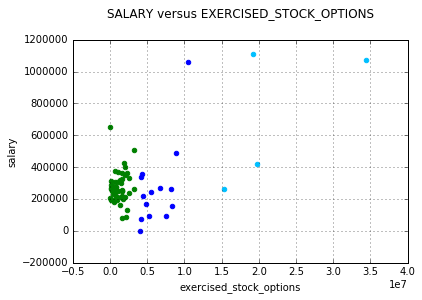

In [44]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 

features_list = [poi, feature_2, feature_1] #
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)
_, finance_features = targetFeatureSplit( data )

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=100, max_iter=500)
km.fit(finance_features)
pred = km.predict(finance_features)

colors = ["g", "deepskyblue", "b", "m", "k"]

for i, point in enumerate(finance_features):
    x = point[0]
    y = point[1]
    plt.scatter(x, y, color = colors[pred[i]])
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[2])
plt.grid(True)
plt.title(features_list[2].upper()+' versus '+features_list[1].upper(), y=1.08)
plt.show()

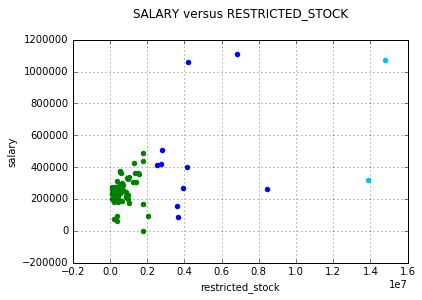

In [45]:
features_list = [poi, feature_3, feature_1]
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)
_, finance_features = targetFeatureSplit( data )

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=100, max_iter=500)
km.fit(finance_features)
pred = km.predict(finance_features)

colors = ["g", "deepskyblue", "b", "m", "k"]

for i, point in enumerate(finance_features):
    x = point[0]
    y = point[1]
    plt.scatter(x, y, color = colors[pred[i]])
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[2])
plt.grid(True)
plt.title(features_list[2].upper()+' versus '+features_list[1].upper(), y=1.08)
plt.show()

In [6]:
### Find min/max values to help with feature scaling

def findMinMaxFeature(feature):
    temp = []

    for key, value in data_dict.iteritems():
        if (data_dict[key][feature] != "NaN"):
            temp.append(data_dict[key][feature])
        else:
            continue

    print "{:17}${:>12,.2f}{:18}${:<12,.2f}".format('Max value of '+feature+' is ', max(temp),
                                                    '\nMin value of '+feature+' is ', min(temp))


In [7]:
findMinMaxFeature('salary')
findMinMaxFeature('exercised_stock_options')

Max value of salary is $1,111,258.00
Min value of salary is $477.00      
Max value of exercised_stock_options is $34,348,384.00
Min value of exercised_stock_options is $3,285.00    


## Feature Rescaling

In [8]:
### Min/Max rescaler

from __future__ import division

def featureScaling(arr):
    
    import numpy
    
    
    y = numpy.asarray(arr)
    min = y.min()
    max = y.max()
    for i in range(len(y)):
        arr[i] = (y[i] - min) / (max - min)

    return arr

# tests of your feature scaler--line below is input data
data = [115, 140, 175]
print featureScaling(data)


[0.0, 0.41666666666666669, 1.0]


In [12]:
from sklearn.preprocessing import MinMaxScaler 


feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3] #
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( scaler.fit_transform(data) )

for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
    plt.grid(color='r', linestyle='-')
plt.show()

TypeError: unbound method fit_transform() must be called with MinMaxScaler instance as first argument (got ndarray instance instead)

In [ ]:
findMinMaxFeature('salary')
findMinMaxFeature('exercised_stock_options')

In [ ]:
### Quiz, what is the new feature of a slary of 200k, and an exercise stock option of $1M

from sklearn.preprocessing import MinMaxScaler
xSalary = numpy.array([[477.], [200000.], [1111258.00]])
xExStockOptions = numpy.array([[3285.00], [1000000.], [34348384.00]])

rescaled_xSalary = scaler.fit_transform(xSalary)
rescaled_xExStockOptions = scaler.fit_transform(xExStockOptions)

print rescaled_xSalary, rescaled_xExStockOptions